In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Import

In [11]:
df = pd.read_csv("completed_datasets/customer_order_time_finished.csv", sep = ",")
df.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_geo_lat,customer_geo_lng,seller_id,seller_zip_code_prefix,seller_city,seller_state,...,sum_product_weight_g,sum_product_height_cm,sum_product_width_cm,sum_product_length_cm,summed_freight_value,min_order_purchase_timestamp,max_order_delivered_carrier_date,max_order_delivered_customer_date,max_order_estimated_delivery_date,delivery_days
0,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ,-21.762775,-41.309633,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,...,650.0,9.0,14.0,28.0,13.29,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,7.614421
1,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP,-20.220527,-50.903424,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,...,30000.0,30.0,40.0,50.0,19.93,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,16.216181
2,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG,-19.870305,-44.593326,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,...,3050.0,13.0,33.0,33.0,17.87,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,7.948437
3,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP,-23.089925,-46.611654,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,...,200.0,10.0,15.0,16.0,12.79,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,6.147269
4,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP,-23.243402,-46.827614,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,...,3750.0,40.0,30.0,35.0,18.14,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,25.114352


### Heatmap to check for correlation between data

In [12]:
df_og = df.copy()
df = df.drop(
    [
        "customer_city",
        "customer_state",
        "seller_city",
        "seller_state",
        "order_item_id",
        "count_product_id",
        "min_order_purchase_timestamp",
        "max_order_delivered_carrier_date",
        "max_order_delivered_customer_date",
        "max_order_estimated_delivery_date",
        "customer_id",
        "seller_id",
        "order_id"
    ],
    axis = 1
)
df.head(5)

,customer_zip_code_prefix,customer_geo_lat,customer_geo_lng,seller_zip_code_prefix,seller_geo_lat,seller_geo_lng,sum_product_weight_g,sum_product_height_cm,sum_product_width_cm,sum_product_length_cm,summed_freight_value,delivery_days
0,28013,-21.762775,-41.309633,27277,-22.496953,-44.127492,650.0,9.0,14.0,28.0,13.29,7.614421
1,15775,-20.220527,-50.903424,3471,-23.565096,-46.518565,30000.0,30.0,40.0,50.0,19.93,16.216181
2,35661,-19.870305,-44.593326,37564,-22.262584,-46.171124,3050.0,13.0,33.0,33.0,17.87,7.948437
3,12952,-23.089925,-46.611654,14403,-20.553624,-47.387359,200.0,10.0,15.0,16.0,12.79,6.147269
4,13226,-23.243402,-46.827614,87900,-22.929384,-53.135873,3750.0,40.0,30.0,35.0,18.14,25.114352


<Axes: >

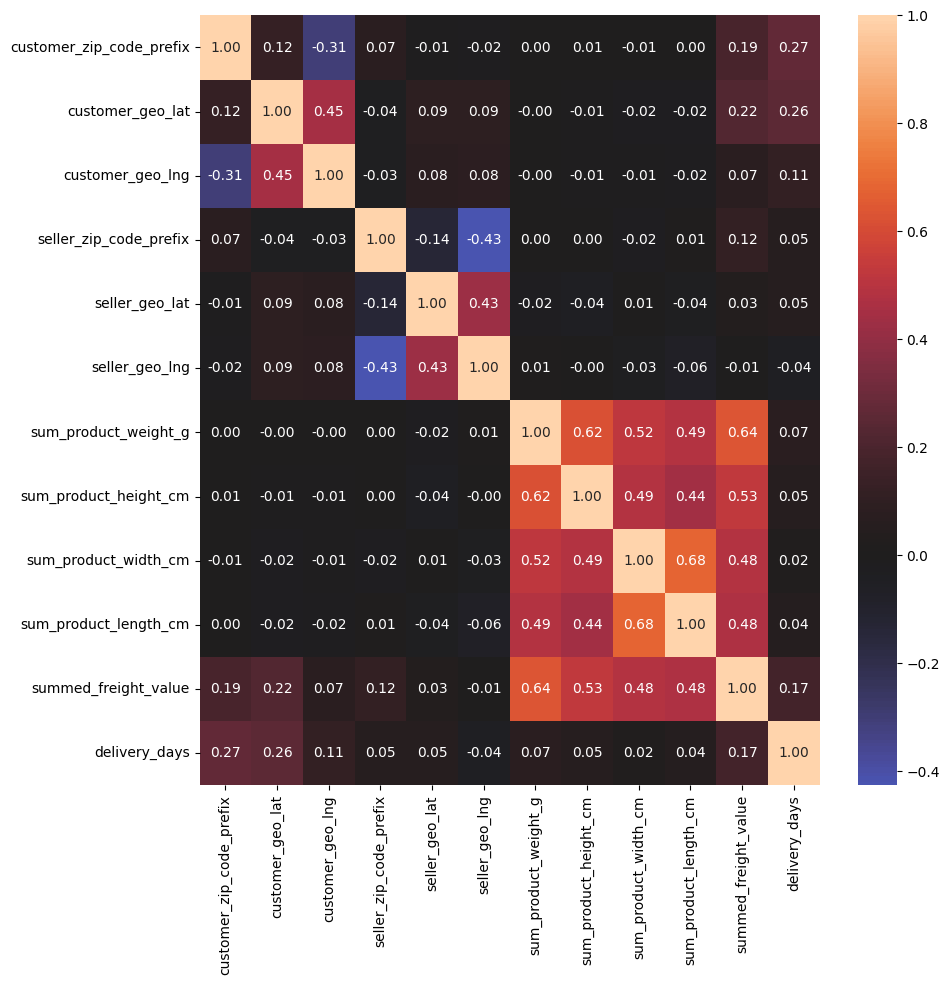

In [13]:
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

sns.heatmap(
    df.corr(method = "pearson"),
    annot = True,
    fmt = ".2f",
    center = 0
)

## Nan check

In [14]:
df.isnull().sum()
# Because in SQL i didn't check for all variables, but only for:
# order_delivered_carrier_date and order_delivered_customer_date

customer_zip_code_prefix      0
customer_geo_lat            270
customer_geo_lng            270
seller_zip_code_prefix        0
seller_geo_lat              217
seller_geo_lng              217
sum_product_weight_g         16
sum_product_height_cm        16
sum_product_width_cm         16
sum_product_length_cm        16
summed_freight_value          0
delivery_days                 0
dtype: int64

In [15]:
order_datetime = df_og["min_order_purchase_timestamp"]
order_datetime = pd.to_datetime(order_datetime)
order_datetime = order_datetime.dt.dayofweek
print(order_datetime.isna().sum().sum())
order_datetime.head(100)

0


0     2
1     2
2     6
3     2
4     5
     ..
95    5
96    4
97    6
98    5
99    2
Name: min_order_purchase_timestamp, Length: 100, dtype: int32

In [16]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean(), axis = 0)

print(df.isnull().sum().sum())
df.head(5)

0


,customer_zip_code_prefix,customer_geo_lat,customer_geo_lng,seller_zip_code_prefix,seller_geo_lat,seller_geo_lng,sum_product_weight_g,sum_product_height_cm,sum_product_width_cm,sum_product_length_cm,summed_freight_value,delivery_days
0,28013,-21.762775,-41.309633,27277,-22.496953,-44.127492,650.0,9.0,14.0,28.0,13.29,7.614421
1,15775,-20.220527,-50.903424,3471,-23.565096,-46.518565,30000.0,30.0,40.0,50.0,19.93,16.216181
2,35661,-19.870305,-44.593326,37564,-22.262584,-46.171124,3050.0,13.0,33.0,33.0,17.87,7.948437
3,12952,-23.089925,-46.611654,14403,-20.553624,-47.387359,200.0,10.0,15.0,16.0,12.79,6.147269
4,13226,-23.243402,-46.827614,87900,-22.929384,-53.135873,3750.0,40.0,30.0,35.0,18.14,25.114352


### Features Analysis

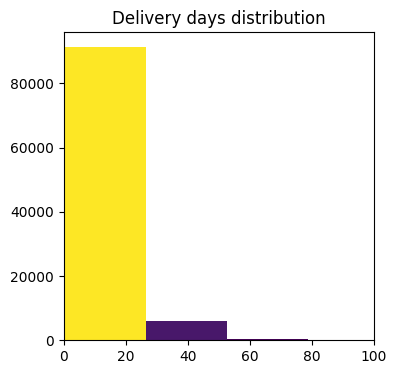

In [17]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(4)

cmap = plt.cm.viridis

counts, values, bars = ax.hist(
    df["delivery_days"],
    bins = 8
)
ax.set(
    xlim = (0, 100)
)
plt.title("Delivery days distribution")

for i, (cnt, value, bar) in enumerate(zip(counts, values, bars)):
    bar.set_facecolor(cmap(cnt/counts.max()))

plt.show()

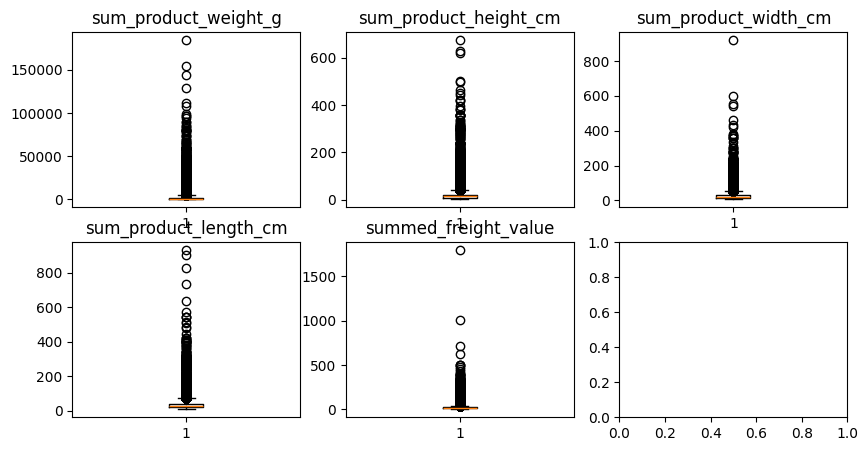

In [18]:
fig, ax = plt.subplots(2, 3)

fig.set_figheight(5)
fig.set_figwidth(10)

cols = ["sum_product_weight_g", "sum_product_height_cm", "sum_product_width_cm", "sum_product_length_cm", "summed_freight_value"]

for i, ax in enumerate(ax.flat):
    try:
        ax.boxplot(
            x = df[cols[i]]
        )
        ax.set_title(cols[i])
    except:
        continue

# XGBoost Model

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return mse, mae

### First Model

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

x, y = df.drop(["customer_zip_code_prefix", "seller_zip_code_prefix", "delivery_days"], axis = 1), df["delivery_days"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

xg_reg = xgb.XGBRegressor(objective = "reg:squarederror", learning_rate = 0.05, max_depth = 7, n_estimators = 500)
xg_reg.fit(x_train, y_train)

y_test_pred = xg_reg.predict(x_test)

mse_xgb, mae_xgb = calculate_metrics(y_test_pred, y_test)
print(f"MSE XGB: {mse_xgb:.2f}")
print(f"RMSE XGB: {np.sqrt(mse_xgb):.2f}")
print(f"MAE XGB: {mae_xgb:.2f}")

MSE XGB: 72.36
RMSE XGB: 8.51
MAE XGB: 5.05


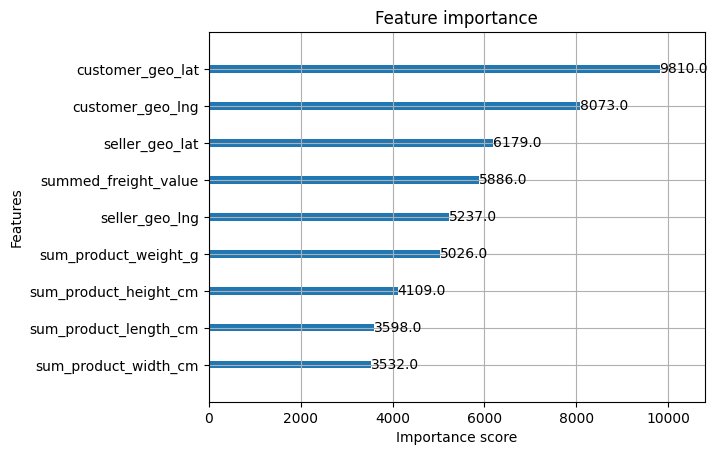

In [21]:
xg_reg.get_booster().feature_names = list(x_train.columns)
xgb.plot_importance(xg_reg)
plt.show()

### Second Model Preparation

In [22]:
import math
def make_km(lat1, lng1, lat2, lng2):
    r = 6371 # Radius of earth in km
    dlat = (lat2 - lat1) * math.pi / 180
    dlng = (lng2 - lng1) * math.pi / 180

    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dlng / 2) * math.sin(dlng / 2)

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = r * c
    return d

x_new = x.copy()

x_new["km"] = x.apply(lambda x_: make_km(x_["customer_geo_lat"], x_["customer_geo_lng"], x_["seller_geo_lat"], x_["seller_geo_lng"]), axis = 1)

In [23]:
x_new["delivery_start_day_of_the_week"] = order_datetime

x_new = x_new.drop(["customer_geo_lat", "customer_geo_lng", "seller_geo_lat", "seller_geo_lng"], axis = 1)
print(x_new.columns)

Index(['sum_product_weight_g', 'sum_product_height_cm', 'sum_product_width_cm',
       'sum_product_length_cm', 'summed_freight_value', 'km',
       'delivery_start_day_of_the_week'],
      dtype='str')


### Second Model

In [24]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new, y, test_size = 0.2, random_state = 42)

xg_reg2 = xgb.XGBRegressor(objective = "reg:squarederror", learning_rate = 0.05, max_depth = 7, n_estimators = 500)
xg_reg2.fit(x_train2, y_train2)

y_test_pred_2 = xg_reg2.predict(x_test2)

mse_xgb2, mae_xgb2 = calculate_metrics(y_test_pred_2, y_test2)
print(f"MSE XGB2: {mse_xgb2:.2f}")
print(f"RMSE XGB2: {np.sqrt(mse_xgb2):.2f}")
print(f"MAE XGB2: {mae_xgb2:.2f}")

MSE XGB2: 75.74
RMSE XGB2: 8.70
MAE XGB2: 5.29


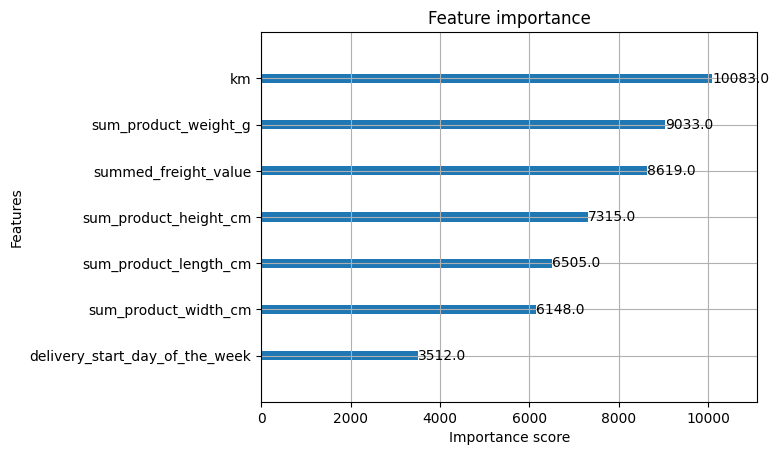

In [25]:
xg_reg2.get_booster().feature_names = list(x_train2.columns)
xgb.plot_importance(xg_reg2)
plt.show()

## Models Residue Distributions

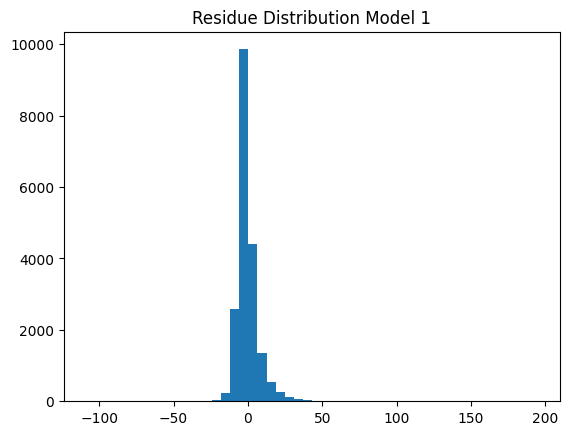

In [17]:
residuals = y_test - y_test_pred
plt.hist(residuals, bins = 50)
plt.title("Residue Distribution Model 1")
plt.show()

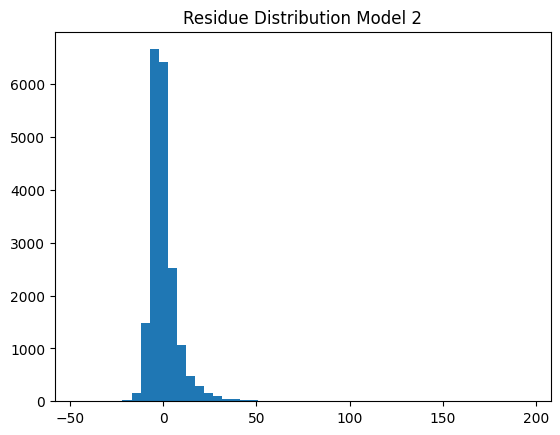

In [18]:
residuals = y_test2 - y_test_pred_2
plt.hist(residuals, bins = 50)
plt.title("Residue Distribution Model 2")
plt.show()

## Explanation Model 1

100%|===================| 19530/19564 [04:22<00:00]        

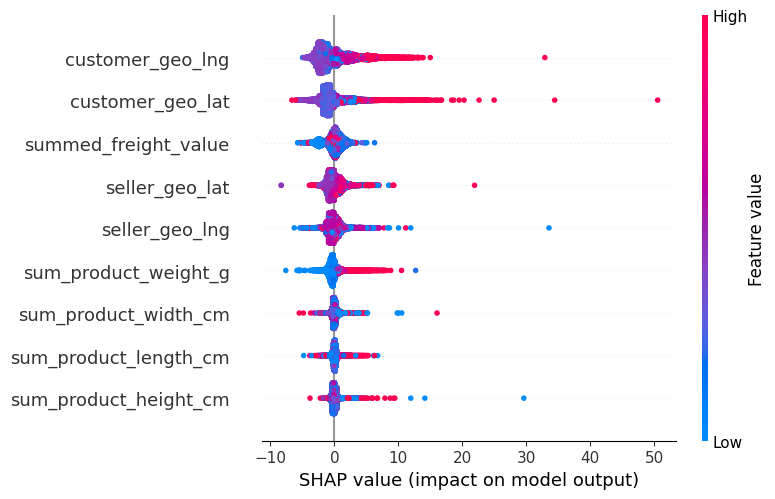

In [38]:
import shap
X500 = shap.utils.sample(x_train, 500)
exp = shap.Explainer(xg_reg, X500)
exp_value = exp(x_test)

shap.summary_plot(exp_value, x_test)

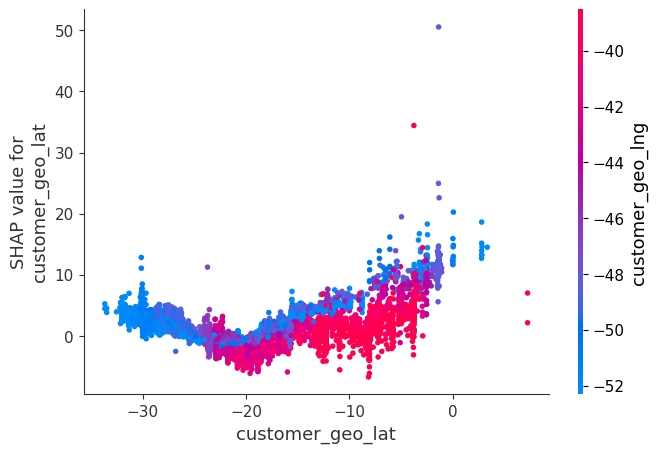

In [39]:
shap.dependence_plot(
    "customer_geo_lat",
    exp_value.values,
    x_test,
    interaction_index = "customer_geo_lng",
    show = True
)

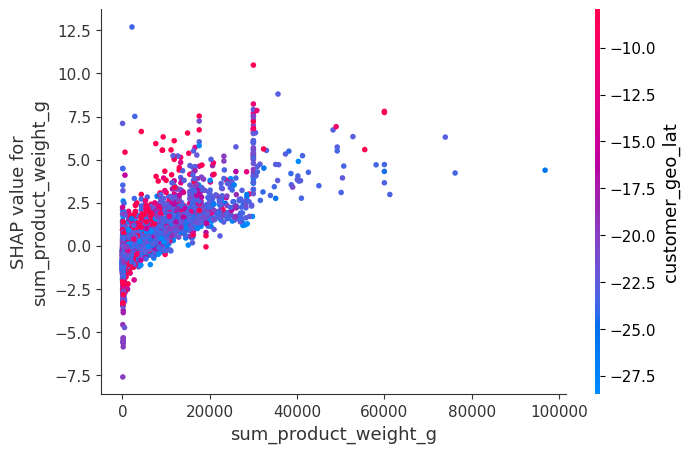

In [40]:
shap.dependence_plot(
    "sum_product_weight_g",
    exp_value.values,
    x_test,
    show = True
)

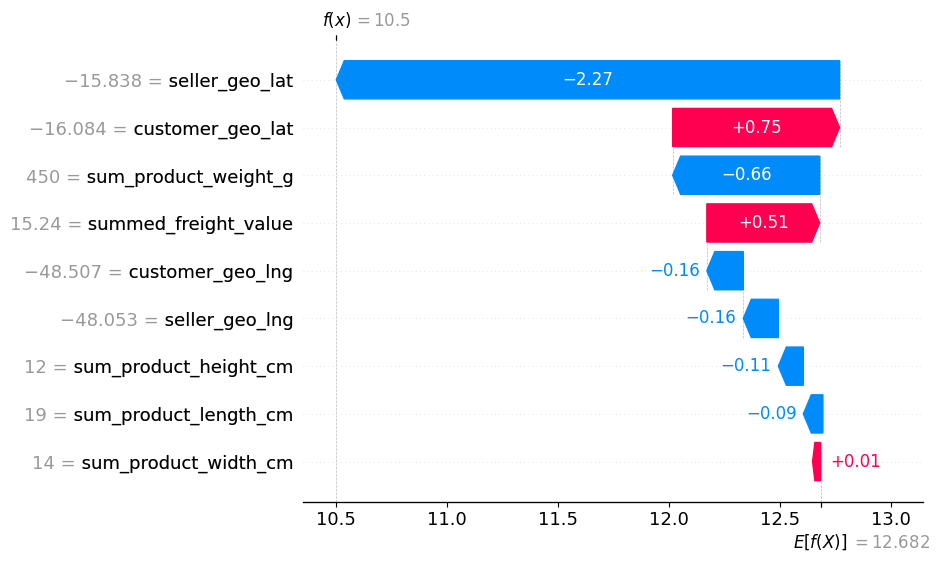

In [41]:
shap.plots.waterfall(exp_value[42])

## Explanation Model 2

100%|===================| 19539/19564 [04:23<00:00]        

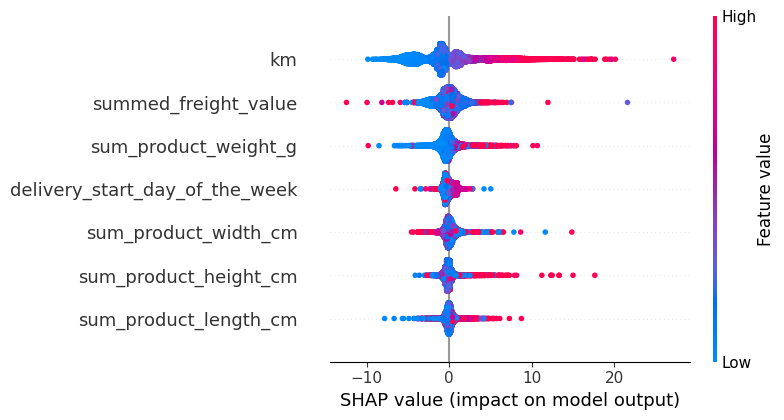

In [42]:
X5002 = shap.utils.sample(x_train2, 500)
exp2 = shap.Explainer(xg_reg2, X5002)
exp_value2 = exp2(x_test2)

shap.summary_plot(exp_value2, x_test2)

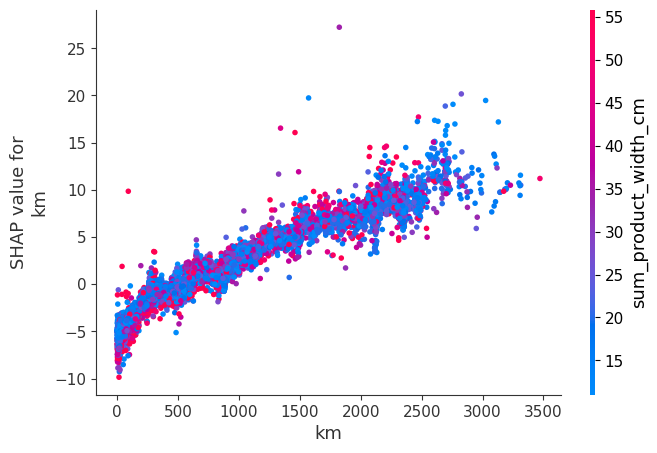

In [45]:
shap.dependence_plot(
    "km",
    exp_value2.values,
    x_test2,
    show = True
)

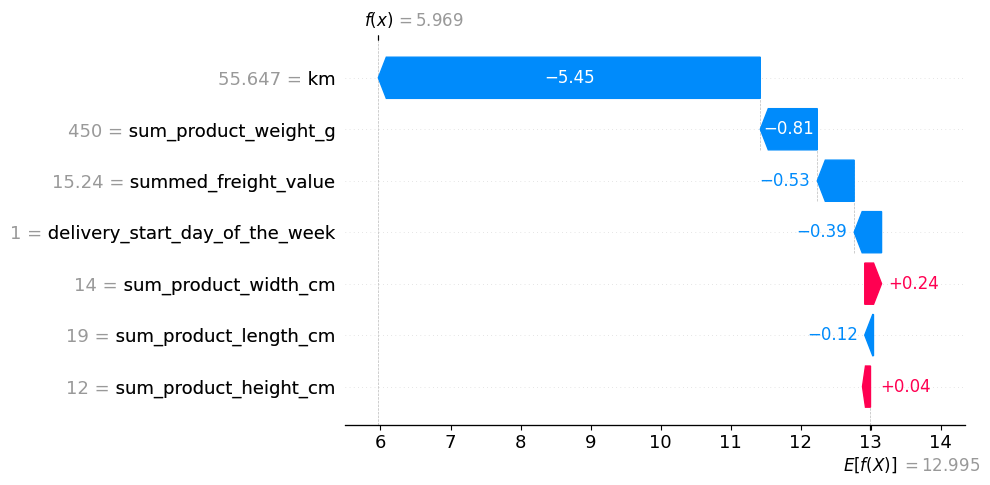

In [44]:
shap.plots.waterfall(exp_value2[42])